# **DYNAMICS PRICING**
**Alan Vladimir, Jesus Coss, Jesus F. Ortega**

_Equipo de analisis numerico_

## **1. Abstrac**

El siguiente proyecto esta dividido entres fases.
* **Fase 1.** Prediccion de la Demanda base
* **Fase 2.** Modelado de la Elasticidad del Precio y Predicci√≥n de la Demanda Ajustada por Precio.
* **Fase 3.** Optimizaci√≥n del precio para Maximizar Ingresos.

## **2. Objetivos**

* _Predecir_  **la cantidad de pasajeros esperada** para un viaje dado su fecha, hora,dia de la semana, anticipaci√≥n de compra, eventos especiales, etc, asumiendo un precio "base" o promedio historico.

* _Entender y Modelar_ como la demanda de pasajeros **cambia en funci√≥n del precio.** Incorporando el precio como una variable clave.

* Dados los modelos de las Fase 1 y 2, _encotrar_ **el precio que maximiza el ingreso total (Precio x Demanda)** para cada iaje especifico.

## **3. Fase 1: Predeiccion de cantida de pasajeros esperada.**

Se  obtendra un modelo que prediga la demanda esperada para un viaje especifico y con esti tener una idea de la "popularidad" intriseca de cada viaje. Observando aqui que tan sensible es el viaje a factores externos.

### **3.1 Ingesta de Datos**

In [1]:
from google.colab import drive
import pandas as pd

# 1. Montar Google Drive
print("Conectando con Google Drive...")
drive.mount('/content/drive')
print("¬°Conexi√≥n exitosa!")

# 2. Ruta del explorador de archivos de Colab.
file_path = '/content/drive/MyDrive/Grupo_IAMSA/Proyectos/DYNAMICS_PRICING/Datos_ETN_MEXN_GDL.csv.gz'

try:
    # 3. Leemos el archivo directamente usando su ruta en el sistema de Colab.
    print(f"Cargando archivo desde: {file_path}")
    df = pd.read_csv(file_path, compression='gzip')
    print("\n¬°DataFrame creado exitosamente!")

except FileNotFoundError:
    print(f"\n¬°ERROR! No se encontr√≥ el archivo en la ruta especificada.")
    print("Por favor, verifica que la ruta que pegaste sea la correcta.")

Conectando con Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
¬°Conexi√≥n exitosa!
Cargando archivo desde: /content/drive/MyDrive/Grupo_IAMSA/Proyectos/DYNAMICS_PRICING/Datos_ETN_MEXN_GDL.csv.gz

¬°DataFrame creado exitosamente!


In [2]:
import pandas as pd
df.head()

OPERACION FECHA_OPERACION       HORA_OPERACION NOMBRE_DIA_OPERACION  \
0  173151327      2023-01-01  1900-01-01 00:17:12                6_Dom   
1  173151469      2023-01-01  1900-01-01 00:55:33                6_Dom   
2  173151470      2023-01-01  1900-01-01 00:55:33                6_Dom   
3  173151505      2023-01-01  1900-01-01 01:02:11                6_Dom   
4  173151549      2023-01-01  1900-01-01 01:12:42                6_Dom   

           AREA_VENTA CLASE_SERVICIO ORIGEN DESTINO  CV_CORRIDA FECHA_CORRIDA  \
0  VENTA WEB SERVICES  DOS PISOS ETN   MEXN    GDLJ     1210717    2023-01-01   
1  VENTA WEB SERVICES  DOS PISOS ETN   MEXN    GDLJ     1210691    2023-01-03   
2  VENTA WEB SERVICES  DOS PISOS ETN   MEXN    GDLJ     1210691    2023-01-03   
3  VENTA WEB SERVICES  DOS PISOS ETN   MEXN    GDLJ     1204313    2023-01-02   
4  VENTA WEB SERVICES  DOS PISOS ETN   MEXN    GDLJ     1209870    2023-01-02   

   ... IVA_TARIFA_BASE_TRAMO INGRESO_TRANSP IVA_TRANSP DISPONIBILIDAD_TRAMO  \
0  ...               156.552       27176.44    4348.31                    0   
1  ...               156.552       17964.76    2874.44                   12   
2  ...               156.552       17964.76    2874.44                   12   
3  ...               156.552       13732.63    2197.27                   17   
4  ...               156.552       16517.44    2642.86                   13   

  OCUPACION_TRAMO PAX_BAJAN  PAX_SUBEN  TEL_PASAJERO CORREO_ELECTRONICO  \
0            35.0       0.0         35           NaN                NaN   
1            23.0       0.0         23           NaN                NaN   
2            23.0       0.0         23           NaN                NaN   
3             0.0       0.0         18           NaN                NaN   
4             0.0       0.0         22           NaN                NaN   

   MEMBRESIA_CRM  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  

[5 rows x 47 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325977 entries, 0 to 325976
Data columns (total 47 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   OPERACION                   325977 non-null  int64  
 1   FECHA_OPERACION             325977 non-null  object 
 2   HORA_OPERACION              325977 non-null  object 
 3   NOMBRE_DIA_OPERACION        325977 non-null  object 
 4   AREA_VENTA                  325977 non-null  object 
 5   CLASE_SERVICIO              325977 non-null  object 
 6   ORIGEN                      325977 non-null  object 
 7   DESTINO                     325977 non-null  object 
 8   CV_CORRIDA                  325977 non-null  int64  
 9   FECHA_CORRIDA               325977 non-null  object 
 10  HORA_SALIDA_CORRIDA         325977 non-null  object 
 11  TIPO_PASAJERO               325977 non-null  object 
 12  TIPO_CLIENTE                325977 non-null  object 
 13  TIPO_OPERACION

### **3.2 Analisis Exploratorio de Datos (EDA)**

* **Paso 1 : Limpieza y Transformaci√≥n de tipo de Datos**

In [4]:
 #print(df["TARIFA_BASE_TRAMO"].unique())
#print(df["TIPO_BUS"].unique())
#print(df["KMS_TRAMO"].unique())
print(df["ORIGEN"].unique())
print(df["DESTINO"].unique())
#print(df["CLASE_SERVICIO"].unique())

['MEXN' 'MXST' 'TEPO']
['GDLJ']


* **Paso 2: Entendimiento del Negocio a trav√©s de los Datos**

In [5]:
# Exploramos las variables categ√≥ricas clave
print("Valores √∫nicos para ORIGEN:", df['ORIGEN'].unique())
print("Valores √∫nicos para DESTINO:", df['DESTINO'].unique())
print("Valores √∫nicos para CLASE_SERVICIO:", df['CLASE_SERVICIO'].unique())
print("Valores √∫nicos para TIPO_BUS:", df['TIPO_BUS'].unique())
print("Valores √∫nicos para AREA_VENTA:", df['AREA_VENTA'].unique())
print("Valores √∫nicos para NOMBRE_DIA_CORRIDA:", df['NOMBRE_DIA_CORRIDA'].unique())

Valores √∫nicos para ORIGEN: ['MEXN' 'MXST' 'TEPO']
Valores √∫nicos para DESTINO: ['GDLJ']
Valores √∫nicos para CLASE_SERVICIO: ['DOS PISOS ETN' 'DE LUJO' 'TURISTAR LUJO' 'DOS PISOS TURISTAR'
 'UN PISO DE LUJO' 'UN PISO TURISTAR LUJO' 'DTM DOS PISOS']
Valores √∫nicos para TIPO_BUS: ['MAN AYATS 2019' 'MAN AYATS-2014' 'MARCOPOLO 2019' 'MARCOPOLO 2017'
 'MAN AYATS 2015' 'VOLVO LUXURY' 'MARCOPOLO 2018' 'MAN AYATS 2016'
 'MAN AYATS 2017' 'MAN AYATS-2013' 'MAN AYATS' 'NEOPLAN 7550'
 'VOLVO 9700 2010' 'MAN AYATS 21' 'MAN AYATS 2013' 'VOLVO LUXURY 2014'
 'MAN AYATS 23' 'VOLVO LUXURY 2013' 'MAN AYATS 2012' 'MARCOPOLO 2016'
 'VOLVO EURO 6' 'VOLVO 9800-2018' 'MARCOPOLO 2025' 'VOLVO 9800-2017'
 'VOLVO LUXURY 2012' 'VOLVO 9700-24 TURISMO']
Valores √∫nicos para AREA_VENTA: ['VENTA WEB SERVICES' 'MEXICO NORTE' 'GUADALAJARA' 'MEXICO PONIENTE'
 'ACAPULCO' 'MEXICO SUR' 'PUEBLA' 'CENTRO TELEFONICO MEXICO'
 'CHILPANCINGO' 'PV CONDOPLAZA' 'TEPOTZOTLAN' 'SAN JUAN DEL RIO'
 'CUERNAVACA' 'VENTAS POR INTERNET'

#### **3.2.1 Hallazgos iniciales.**


* **ORIGEN y DESTINO:** ¬°Interesante! Aunque el foco es MEXN -> GDLJ, los datos incluyen corridas que parten de 'MXST' (Terminal Sur) y 'TEPO' (Tepotzotl√°n). Esto es importante. Deberemos filtrar nuestros datos para quedarnos solo con la ruta que nos interesa en nuestro modelo piloto.

* **CLASE_SERVICIO y TIPO_BUS:** Hay varias categor√≠as. Algunas parecen similares (ej. 'TURISTAR LUJO' y 'UN PISO TURISTAR LUJO'). M√°s adelante, podr√≠amos agruparlas para simplificar el modelo (Feature Engineering).

* **AREA_VENTA:** Esta es una variable con alta cardinalidad (much√≠simos valores √∫nicos). Graficar todas las √°reas de venta ser√≠a ilegible. Aqu√≠ aplicaremos una t√©cnica muy com√∫n: analizar el "Top N" de las √°reas m√°s importantes.

* **NOMBRE_DIA_CORRIDA:** Los valores son consistentes y limpios (0_Lun, 1_Mar, etc.). ¬°Perfecto!

#### **3.2.2: Visualizaci√≥n de Frecuencias (Histogramas para Categor√≠as)**

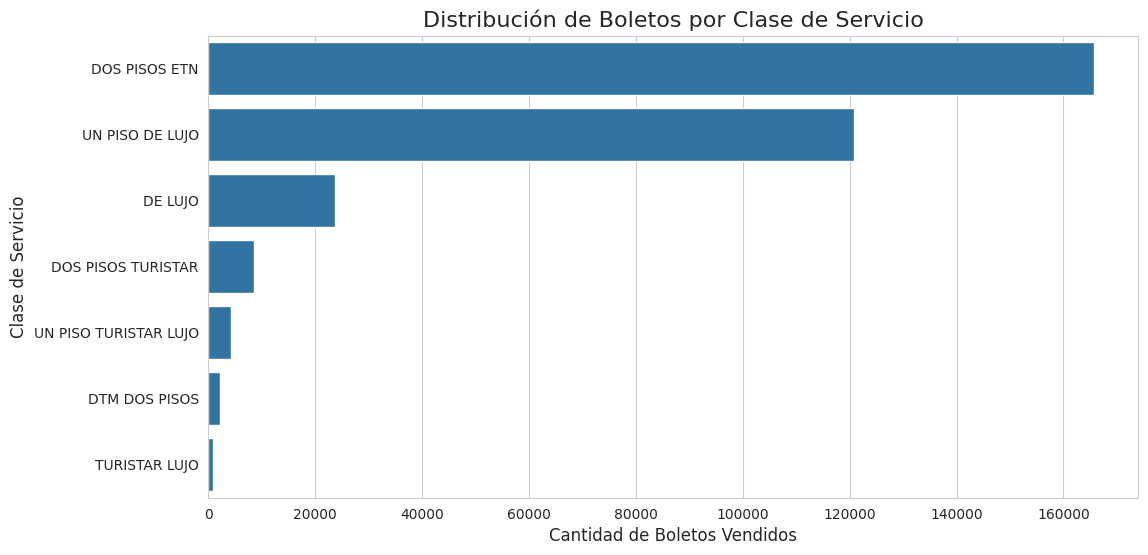

/tmp/ipython-input-1471779836.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['NOMBRE_DIA_CORRIDA'], order=dias_ordenados, palette='viridis')


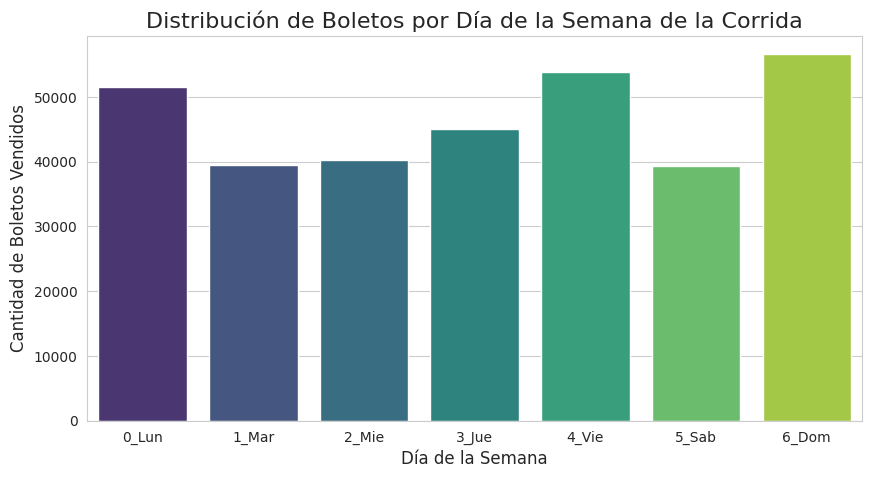

/tmp/ipython-input-1471779836.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_15_areas.index, x=top_15_areas.values, palette='plasma')


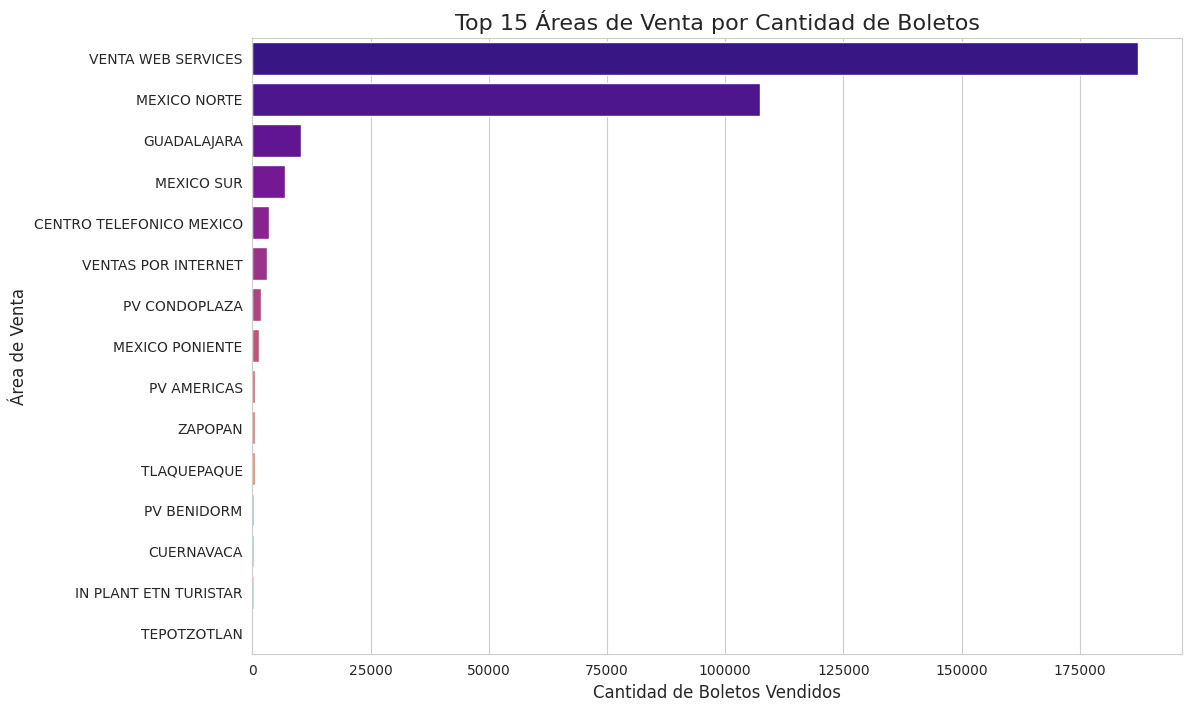

/tmp/ipython-input-1471779836.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_origenes.index, y=conteo_origenes.values, palette='viridis')


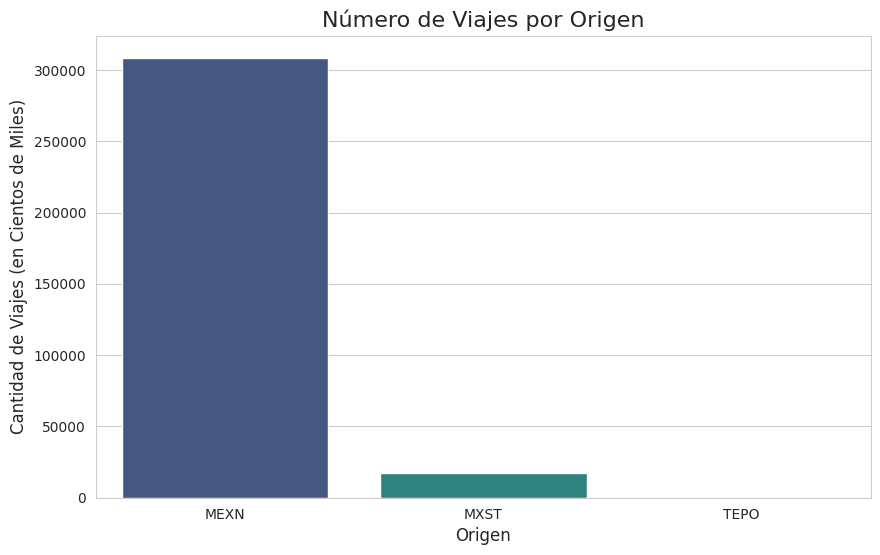

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Establecemos un estilo visual agradable para los gr√°ficos
sns.set_style("whitegrid")

# --- 1. Gr√°fico para CLASE_SERVICIO ---
plt.figure(figsize=(12, 6))
sns.countplot(y=df['CLASE_SERVICIO'], order = df['CLASE_SERVICIO'].value_counts().index)
plt.title('Distribuci√≥n de Boletos por Clase de Servicio', fontsize=16)
plt.xlabel('Cantidad de Boletos Vendidos', fontsize=12)
plt.ylabel('Clase de Servicio', fontsize=12)
plt.show()

# --- 2. Gr√°fico para NOMBRE_DIA_CORRIDA ---
plt.figure(figsize=(10, 5))
# Ordenamos los d√≠as de la semana para que se muestren l√≥gicamente
dias_ordenados = sorted(df['NOMBRE_DIA_CORRIDA'].unique())
sns.countplot(x=df['NOMBRE_DIA_CORRIDA'], order=dias_ordenados, palette='viridis')
plt.title('Distribuci√≥n de Boletos por D√≠a de la Semana de la Corrida', fontsize=16)
plt.xlabel('D√≠a de la Semana', fontsize=12)
plt.ylabel('Cantidad de Boletos Vendidos', fontsize=12)
plt.show()

# --- 3. Gr√°fico para AREA_VENTA (¬°T√©cnica Especial para Alta Cardinalidad!) ---
# Contamos las ventas por √°rea y nos quedamos con las 15 principales
top_15_areas = df['AREA_VENTA'].value_counts().nlargest(15)
plt.figure(figsize=(12, 8))
sns.barplot(y=top_15_areas.index, x=top_15_areas.values, palette='plasma')
plt.title('Top 15 √Åreas de Venta por Cantidad de Boletos', fontsize=16)
plt.xlabel('Cantidad de Boletos Vendidos', fontsize=12)
plt.ylabel('√Årea de Venta', fontsize=12)
plt.show()

# ---- 4.

# Calculamos el conteo de or√≠genes
conteo_origenes = df["ORIGEN"].value_counts()

# --- Generamos la Gr√°fica de Barras ---
plt.figure(figsize=(10, 6))
sns.barplot(x=conteo_origenes.index, y=conteo_origenes.values, palette='viridis')

plt.title('N√∫mero de Viajes por Origen', fontsize=16)
plt.xlabel('Origen', fontsize=12)
plt.ylabel('Cantidad de Viajes (en Cientos de Miles)', fontsize=12)
plt.show()


#### **3.2.2.1 Interpretaci√≥n de los Hallazgo de los graficos**

* **1. Distribuci√≥n por D√≠a de la Semana:**

  * **Observaci√≥n:** Tal como sospech√°bamos, los viernes y domingos son los d√≠as de mayor demanda, con el lunes tambi√©n siendo un d√≠a fuerte. El s√°bado, curiosamente, es m√°s bajo.

  * **Impacto en el Modelo:** Esto confirma que el d√≠a de la semana ser√° una variable predictora muy potente. Podremos justificar precios m√°s altos en los d√≠as pico. El comportamiento del lunes podr√≠a indicar viajes de negocio, mientras que viernes y domingo son m√°s de ocio o viajes de fin de semana.

* **2. Distribuci√≥n por Clase de Servicio:**

  * **Observaci√≥n:** 'DOS PISOS ETN' y 'UN PISO DE LUJO' dominan por completo el mercado en esta ruta. Las otras clases son casi anecd√≥ticas en comparaci√≥n.

  * **Impacto en el Modelo:** Nuestro modelo debe ser extremadamente preciso para estas dos clases de servicio, ya que ah√≠ es donde se concentra la mayor parte del ingreso potencial. Podemos decidir si incluimos las otras clases o las excluimos en una primera versi√≥n para simplificar.

* **3. Top 15 √Åreas de Venta (Canales):**

  * **Observaci√≥n:** El canal online ('VENTA WEB SERVICES') es el rey indiscutible, seguido muy de lejos por la taquilla de 'MEXICO NORTE'.

  * **Impacto en el Modelo:** ¬°Esto es una noticia fant√°stica para nosotros! Los clientes que compran online suelen ser m√°s sensibles al precio, comparan m√°s y son m√°s receptivos a ofertas din√°micas. Nuestro modelo tendr√° un impacto directo y medible en el canal de venta m√°s importante.

* **4. N√∫mero de Viajes por Origen:**

  * **Observaci√≥n:** M√©xico Norte (MEXN) es pr√°cticamente el 99% de nuestro universo para los datos que tenemos. Los otros or√≠genes son insignificantes.

  * **Impacto en el Modelo:** Esto nos simplifica enormemente el trabajo. Tomemos la decisi√≥n ejecutiva de filtrar y trabajar √∫nicamente con los viajes que salen de 'MEXN'. As√≠, nuestro primer modelo ser√° espec√≠fico para la ruta m√°s importante y no se ver√° "contaminado" por datos de otras rutas que podr√≠an tener comportamientos diferentes.

**Eliminamos Registros con "ORIGEN" distintos a "MEXN"**

In [7]:
 #Primero, filtramos para quedarnos solo con nuestro origen de inter√©s
print(f"Registros originales: {len(df)}")
df_filtrado = df[df['ORIGEN'] == 'MEXN'].copy()
print(f"Registros despu√©s de filtrar por origen 'MEXN': {len(df_filtrado)}")

Registros originales: 325977
Registros despu√©s de filtrar por origen 'MEXN': 308646


**Eliminamos registros con distancias distintas a 520 KMS**

* **PASO 1: Cuatificamos el ruido**

In [8]:
# Contamos los valores y los mostramos como porcentajes
conteo_porcentual = df['KMS_TRAMO'].value_counts(normalize=True) * 100

print("Porcentaje de registros por cada valor de KMS_TRAMO:")
print(conteo_porcentual)

Porcentaje de registros por cada valor de KMS_TRAMO:
KMS_TRAMO
520.0    94.667722
538.0     4.149066
528.0     0.652500
532.0     0.508625
533.0     0.007669
690.0     0.007056
587.0     0.003681
557.0     0.002761
565.0     0.000614
490.0     0.000307
Name: proportion, dtype: float64


In [9]:
# Definimos nuestro kilometraje correcto basado en la abrumadora mayor√≠a
kilometraje_correcto = 520.0
print(f"\nEl kilometraje considerado como correcto para la ruta es: {kilometraje_correcto} km")

# Guardamos el n√∫mero de registros antes de filtrar
registros_originales = len(df)

# Filtramos el DataFrame para quedarnos SOLAMENTE con los registros correctos
# Usamos .copy() para evitar warnings de SettingWithCopyWarning m√°s adelante
df_filtrado_kms = df[df['KMS_TRAMO'] == kilometraje_correcto].copy()

# Reportamos el impacto de nuestra limpieza
registros_finales = len(df_filtrado_kms)
registros_eliminados = registros_originales - registros_finales
porcentaje_eliminado = (registros_eliminados / registros_originales) * 100

print(f"\nSe eliminaron {registros_eliminados} registros con kilometraje an√≥malo ({porcentaje_eliminado:.2f}% del total).")
print(f"Nuestro nuevo DataFrame 'df_filtrado_kms' tiene {registros_finales} registros.")

# A partir de ahora, todas nuestras operaciones ser√°n sobre este DataFrame limpio.


El kilometraje considerado como correcto para la ruta es: 520.0 km

Se eliminaron 17382 registros con kilometraje an√≥malo (5.33% del total).
Nuestro nuevo DataFrame 'df_filtrado_kms' tiene 308595 registros.


#### **3.2.3 Analisis Tarifas vs Tipo Autobus y Tarifa vs Clase Servicio**


‚úÖ Se ha generado el mapa de calor y guardado como 'heatmap_evolucion_tarifas.png'


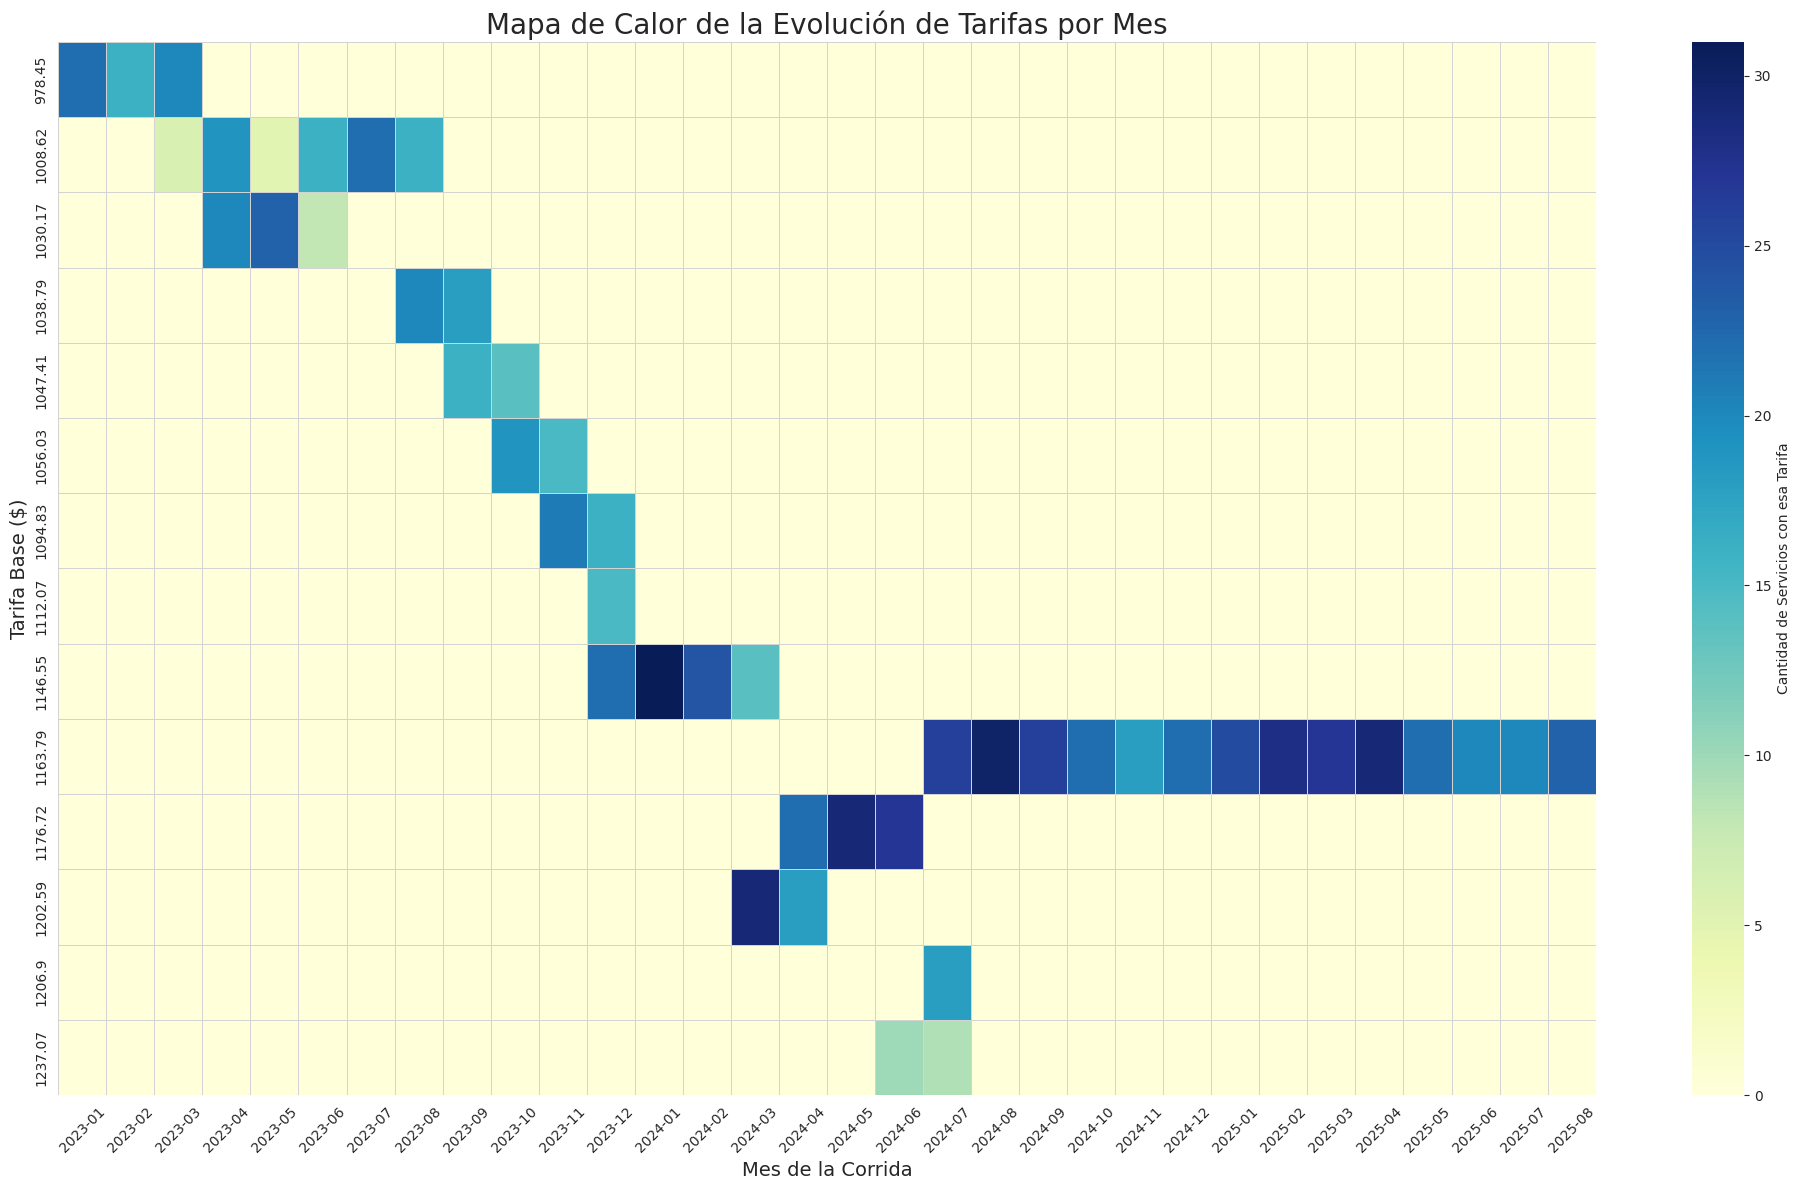

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asumiendo que 'df_filtrado_kms' es tu DataFrame ya modificado y ya est√° cargado

# --- Paso 1: Recrear la tabla de evoluci√≥n de precios ---
# (Incluyo todos los pasos para que el c√≥digo sea autocontenido)
df_filtrado_kms['FECHA_CORRIDA'] = pd.to_datetime(df_filtrado_kms['FECHA_CORRIDA'], errors='coerce')
df_filtrado_kms['SERVICIO_BUS'] = df_filtrado_kms['CLASE_SERVICIO'] + " - " + df_filtrado_kms['TIPO_BUS']

evolucion_precios = df_filtrado_kms.groupby([
    df_filtrado_kms['FECHA_CORRIDA'].dt.to_period('M'),
    'TARIFA_BASE_TRAMO'
]).agg(
    SERVICIOS_OFRECIDOS=('SERVICIO_BUS', 'unique')
).reset_index()

# --- Paso 2: Preparar los datos para el mapa de calor ---
# Contamos cu√°ntos servicios √∫nicos hab√≠a para cada tarifa/mes
evolucion_precios['NUM_SERVICIOS'] = evolucion_precios['SERVICIOS_OFRECIDOS'].str.len()
# Convertimos el mes a texto para que funcione bien en la tabla pivote
evolucion_precios['FECHA_CORRIDA'] = evolucion_precios['FECHA_CORRIDA'].astype(str)

# Creamos la tabla pivote: los meses ser√°n las columnas, las tarifas las filas
heatmap_data = evolucion_precios.pivot_table(
    index='TARIFA_BASE_TRAMO',
    columns='FECHA_CORRIDA',
    values='NUM_SERVICIOS',
    fill_value=0  # Rellenamos con 0 los meses donde una tarifa no exist√≠a
)

# Ordenamos las columnas cronol√≥gicamente
heatmap_data = heatmap_data.reindex(sorted(heatmap_data.columns), axis=1)

# --- Paso 3: Generar el gr√°fico ---
plt.figure(figsize=(20, 12))  # Hacemos la figura m√°s grande para que sea legible
sns.heatmap(
    heatmap_data,
    cmap='YlGnBu',  # Paleta de colores: Amarillo -> Verde -> Azul
    linewidths=.5,
    linecolor='lightgray',
    cbar_kws={'label': 'Cantidad de Servicios con esa Tarifa'}
)

plt.title('Mapa de Calor de la Evoluci√≥n de Tarifas por Mes', fontsize=20)
plt.xlabel('Mes de la Corrida', fontsize=14)
plt.ylabel('Tarifa Base ($)', fontsize=14)
plt.xticks(rotation=45) # Rotamos las etiquetas de los meses para mejor lectura
plt.tight_layout() # Ajusta el gr√°fico para que todo quepa

# Guardamos la imagen en un archivo
plt.savefig('heatmap_evolucion_tarifas.png')

print("\n‚úÖ Se ha generado el mapa de calor y guardado como 'heatmap_evolucion_tarifas.png'")

#### **3.2.4.1 Interpretaci√≥n de los Hallazgo de los graficos**

* **Se Valida Enfoque:** Ahora se sabe que se esta construyendo algo completamente nuevo para la empresa, no solo mejorando un sistema existente.

* **Ajustar las Expectativas del Modelo:** El modelo de Machine Learning no podr√° aprender de sutiles variaciones diarias de precio en el pasado, ¬°porque no existieron! Tendr√° que aprender la elasticidad a partir de los "experimentos naturales" que ocurrieron cada vez que la empresa decidi√≥ hacer un salto de precio general.

* **Simplifica la Fase 1:** Nuestro modelo de demanda base se vuelve a√∫n m√°s importante. Como el precio era pr√°cticamente constante dentro de cada periodo, podremos modelar la demanda en funci√≥n de las otras variables (d√≠a de la semana, anticipaci√≥n, etc.) con mayor claridad.

* **Pr√≥ximo Objetivo:** La Agregaci√≥n (Ahora con m√°s contexto)
EL an√°lisis ha sido  bueno que se prepara perfectamente para el siguiente paso que hab√≠amos planeado. Ahora que entendemos el comportamiento del precio, necesitamos consolidar nuestros datos a nivel de viaje para empezar a modelar la demanda.

La misi√≥n inmediata sigue siendo la misma, pero ahora con un entendimiento mucho m√°s profundo de lo que significan los datos.

In [11]:
# Asumiendo que ya tienes 'df_filtrado_kms' del paso anterior

print("Agregando datos a nivel de viaje...")
df_viajes = df_filtrado_kms.groupby(['CV_CORRIDA', 'FECHA_CORRIDA']).agg(
    hora_salida=('HORA_SALIDA_CORRIDA', 'first'),
    dia_corrida=('NOMBRE_DIA_CORRIDA', 'first'),
    origen=('ORIGEN', 'first'),
    destino=('DESTINO', 'first'),
    clase_servicio=('CLASE_SERVICIO', 'first'),
    capacidad=('CAPACIDAD_ASIENTOS_TRAMO', 'first'),

    # Nuestra variable objetivo
    boletos_vendidos=('BOLETOS_VEND', 'sum'),

    # Variables de negocio
    ingreso_total_viaje=('INGRESO_TRANSP', 'sum'),
    tarifa_promedio=('TARIFA_BASE_TRAMO', 'mean')
).reset_index()

# Calculamos nuestra segunda posible variable objetivo
df_viajes['tasa_ocupacion'] = df_viajes['boletos_vendidos'] / df_viajes['capacidad']

print("\nDataFrame agregado 'df_viajes' creado exitosamente:")
display(df_viajes.sample(5,random_state=42))

print(f"\nTotal de viajes √∫nicos en nuestro dataset: {len(df_viajes)}")

Agregando datos a nivel de viaje...

DataFrame agregado 'df_viajes' creado exitosamente:


CV_CORRIDA FECHA_CORRIDA          hora_salida dia_corrida origen  \
13694     1255617    2025-06-05  1900-01-01 11:00:00       3_Jue   MEXN   
2375      1201009    2025-08-02  1900-01-01 23:59:00       5_Sab   MEXN   
13652     1255585    2025-07-29  1900-01-01 13:30:00       1_Mar   MEXN   
12445     1251534    2025-07-16  1900-01-01 23:30:00       2_Mie   MEXN   
169       1160619    2023-06-15  1900-01-01 19:40:00       3_Jue   MEXN   

      destino   clase_servicio  capacidad  boletos_vendidos  \
13694    GDLJ  UN PISO DE LUJO       36.0              27.0   
2375     GDLJ    DOS PISOS ETN       36.0              21.0   
13652    GDLJ    DOS PISOS ETN       36.0              31.0   
12445    GDLJ  UN PISO DE LUJO       36.0              34.0   
169      GDLJ    DOS PISOS ETN       35.0               6.0   

       ingreso_total_viaje  tarifa_promedio  tasa_ocupacion  
13694            714892.64          1163.79        0.750000  
2375             419226.99          1163.79        0.583333  
13652            898281.36          1163.79        0.861111  
12445           1225302.40          1163.79        0.944444  
169               31598.28          1008.62        0.171429


Total de viajes √∫nicos en nuestro dataset: 14498


Se han transformado exitosamente los datos transaccionales (una fila por boleto) en un conjunto de datos agregado a nivel de viaje (una fila por corrida). Este nuevo DataFrame, df_viajes, es exactamente lo que necesitamos para construir el modelo de predicci√≥n de demanda.

### **3.3 Preparaci√≥n de datos y Feutere Enigineeing**

#### **3.3.1 Cambio de tipo de variable de dias de la semana**

Ahora Iniciaremos la ingenieria de caracteristicas para identificar cada dia de la semana pues estas son varibles importantes a demas que la hora la convertimos a formato dttime.

In [12]:
import pandas as pd

print("Iniciando la Ingenier√≠a de Caracter√≠sticas...")

# --- 1. Creaci√≥n de Variables de Tiempo ---

# Paso 1: Combinar fecha y hora en una sola columna 'timestamp_salida'
print("Paso 1: Creando columna 'timestamp' unificada...")
# **LA CORRECCI√ìN EST√Å AQU√ç**: A√±adimos .astype(str) a la columna de fecha
df_viajes['timestamp_salida'] = pd.to_datetime(
    df_viajes['FECHA_CORRIDA'].astype(str) + ' ' + pd.to_datetime(df_viajes['hora_salida']).dt.strftime('%H:%M:%S')
)

# Paso 2: Extraer componentes de tiempo del nuevo 'timestamp_salida'
print("Paso 2: Extrayendo caracter√≠sticas de tiempo...")
df_viajes['mes'] = df_viajes['timestamp_salida'].dt.month
df_viajes['dia_semana'] = df_viajes['timestamp_salida'].dt.dayofweek  # Lunes=0, Domingo=6
df_viajes['hora_del_dia'] = df_viajes['timestamp_salida'].dt.hour
df_viajes['dia_del_mes'] = df_viajes['timestamp_salida'].dt.day
df_viajes['semana_del_anio'] = df_viajes['timestamp_salida'].dt.isocalendar().week

# Paso 3: Crear caracter√≠sticas de negocio basadas en el tiempo
print("Paso 3: Creando caracter√≠sticas de negocio...")
# Variable para identificar si es fin de semana
df_viajes['es_fin_de_semana'] = df_viajes['dia_semana'].apply(lambda d: 1 if d >= 4 else 0) # Vie, Sab, Dom

# Variable para identificar si es quincena (d√≠as de pago)
df_viajes['es_quincena'] = df_viajes['dia_del_mes'].apply(
    lambda dia: 1 if (14 <= dia <= 16) or (dia >= 28) else 0
)


print("\n¬°Ingenier√≠a de Caracter√≠sticas completada exitosamente!")
print("A continuaci√≥n, una muestra de las nuevas columnas creadas:")
display(df_viajes[[
    'timestamp_salida',
    'mes',
    'dia_semana',
    'hora_del_dia',
    'es_fin_de_semana',
    'es_quincena'
]].sample(5, random_state=42))

Iniciando la Ingenier√≠a de Caracter√≠sticas...
Paso 1: Creando columna 'timestamp' unificada...
Paso 2: Extrayendo caracter√≠sticas de tiempo...
Paso 3: Creando caracter√≠sticas de negocio...

¬°Ingenier√≠a de Caracter√≠sticas completada exitosamente!
A continuaci√≥n, una muestra de las nuevas columnas creadas:


timestamp_salida  mes  dia_semana  hora_del_dia  es_fin_de_semana  \
13694 2025-06-05 11:00:00    6           3            11                 0   
2375  2025-08-02 23:59:00    8           5            23                 1   
13652 2025-07-29 13:30:00    7           1            13                 0   
12445 2025-07-16 23:30:00    7           2            23                 0   
169   2023-06-15 19:40:00    6           3            19                 0   

       es_quincena  
13694            0  
2375             0  
13652            1  
12445            1  
169              1

**Columnas Creadas:** Todas las nuevas columnas (timestamp_salida, mes, dia_semana, etc.) se han a√±adido correctamente al DataFrame.

#### **3.3.2 Incorporaci√≥n de dias festivos.**

Incorporamos informacion sobre dias festivos, puentes y demas obtenidos de los calendarios oficiales de la SEP.

In [13]:
import pandas as pd
import numpy as np

# ==============================================================================
# PASO 1: CREACI√ìN Y FUSI√ìN DEL CALENDARIO
# ==============================================================================

# --- Parte A: Crear el DataFrame 'df_calendario' ---
print("Creando el calendario de eventos especiales...")

# 1. D√≠as Festivos Oficiales, Puentes y Periodos Vacacionales (Basado en SEP y LFT M√©xico)
eventos = []
# Ciclo 2022-2023
eventos.extend([(d, 'Puente_Festivo') for d in pd.to_datetime(['2022-09-16', '2022-11-21'])])
eventos.extend([(d, 'Dia_Festivo') for d in pd.to_datetime(['2022-11-02'])])
for date in pd.date_range('2022-12-19', '2023-01-06'): eventos.append((date, 'Vacaciones_Navidad'))
for date in pd.date_range('2023-04-03', '2023-04-14'): eventos.append((date, 'Semana_Santa'))
# Ciclo 2023-2024
eventos.extend([(d, 'Puente_Festivo') for d in pd.to_datetime(['2023-09-15', '2023-11-20', '2024-02-05', '2024-03-18'])])
eventos.extend([(d, 'Dia_Festivo') for d in pd.to_datetime(['2023-11-02', '2024-05-01', '2024-05-15'])])
for date in pd.date_range('2023-12-18', '2024-01-05'): eventos.append((date, 'Vacaciones_Navidad'))
for date in pd.date_range('2024-03-25', '2024-04-05'): eventos.append((date, 'Semana_Santa'))
# Ciclo 2024-2025
eventos.extend([(d, 'Puente_Festivo') for d in pd.to_datetime(['2024-09-16', '2024-11-18', '2025-02-03', '2025-03-17'])])
eventos.extend([(d, 'Dia_Festivo') for d in pd.to_datetime(['2024-11-02', '2025-05-01', '2025-05-05', '2025-05-15'])])
for date in pd.date_range('2024-12-19', '2025-01-06'): eventos.append((date, 'Vacaciones_Navidad'))
for date in pd.date_range('2025-04-14', '2025-04-25'): eventos.append((date, 'Semana_Santa'))

df_eventos = pd.DataFrame(eventos, columns=['FECHA', 'TIPO_DIA']).drop_duplicates(subset='FECHA', keep='first')

print("... 'df_calendario' creado con √©xito.")


# --- Parte B: Unir (Merge) el calendario con df_viajes ---
print("\nFusionando calendario con datos de viajes...")

# Aseguramos que las columnas de fecha tengan el formato correcto antes de unir
df_viajes['FECHA_CORRIDA'] = pd.to_datetime(df_viajes['FECHA_CORRIDA'])
df_eventos['FECHA'] = pd.to_datetime(df_eventos['FECHA'])

# Unimos los DataFrames. Usamos 'how=left' para mantener todos nuestros viajes.
df_viajes = pd.merge(
    df_viajes,
    df_eventos,
    left_on='FECHA_CORRIDA',
    right_on='FECHA',
    how='left'
)

# Rellenamos los d√≠as que no son festivos con la etiqueta 'Normal'
df_viajes['TIPO_DIA'].fillna('Normal', inplace=True)
# Eliminamos la columna de fecha duplicada que vino del merge
df_viajes.drop('FECHA', axis=1, inplace=True)

print("‚úÖ Se ha integrado la informaci√≥n del calendario en 'df_viajes'.")
print("\nMuestra aleatoria para verificaci√≥n de la nueva columna 'TIPO_DIA':")
display(df_viajes[['FECHA_CORRIDA', 'dia_corrida', 'TIPO_DIA']].sample(10, random_state=42))

Creando el calendario de eventos especiales...
... 'df_calendario' creado con √©xito.

Fusionando calendario con datos de viajes...
‚úÖ Se ha integrado la informaci√≥n del calendario en 'df_viajes'.

Muestra aleatoria para verificaci√≥n de la nueva columna 'TIPO_DIA':


/tmp/ipython-input-1330286235.py:51: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_viajes['TIPO_DIA'].fillna('Normal', inplace=True)


FECHA_CORRIDA dia_corrida            TIPO_DIA
13694    2025-06-05       3_Jue              Normal
2375     2025-08-02       5_Sab              Normal
13652    2025-07-29       1_Mar              Normal
12445    2025-07-16       2_Mie              Normal
169      2023-06-15       3_Jue              Normal
8443     2024-07-19       4_Vie              Normal
8603     2025-01-01       2_Mie  Vacaciones_Navidad
3751     2024-12-26       3_Jue  Vacaciones_Navidad
4101     2023-01-09       0_Lun              Normal
9983     2024-11-14       3_Jue              Normal

#### **3.2.3 Franjas horarios**

El siguiente paso sera crear franjas de horarios, es decir debido a que los horarios de las salidas no son constantes las dividiremos por , madrugada, ma√±ana, tarde y noche.

In [14]:
import pandas as pd

print("Creando franjas horarias...")

# Definimos los l√≠mites y etiquetas para las franjas horarias
# Bins: [0-5] Madrugada, [6-11] Ma√±ana, [12-17] Tarde, [18-23] Noche
bins = [0, 6, 12, 18, 24]
labels = ['Madrugada', 'Ma√±ana', 'Tarde', 'Noche']

# Usamos pd.cut para segmentar la columna 'hora_del_dia' y crear la nueva caracter√≠stica
df_viajes['franja_horaria'] = pd.cut(
    df_viajes['hora_del_dia'],
    bins=bins,
    labels=labels,
    right=False, # Importante: [0,6) -> incluye 0, excluye 6
    include_lowest=True
)

print("‚úÖ ¬°Columna 'franja_horaria' creada con √©xito!")
print("\nMuestra para verificaci√≥n:")
display(df_viajes[['hora_del_dia', 'franja_horaria']].sample(10, random_state=1))

Creando franjas horarias...
‚úÖ ¬°Columna 'franja_horaria' creada con √©xito!

Muestra para verificaci√≥n:


hora_del_dia franja_horaria
13524            19          Noche
7843              1      Madrugada
12375            23          Noche
12544            12          Tarde
7437              6         Ma√±ana
8909             21          Noche
9251             16          Tarde
3289             23          Noche
5182             10         Ma√±ana
2811             15          Tarde

In [15]:
df_viajes.sample(5, random_state=42)

CV_CORRIDA FECHA_CORRIDA          hora_salida dia_corrida origen  \
13694     1255617    2025-06-05  1900-01-01 11:00:00       3_Jue   MEXN   
2375      1201009    2025-08-02  1900-01-01 23:59:00       5_Sab   MEXN   
13652     1255585    2025-07-29  1900-01-01 13:30:00       1_Mar   MEXN   
12445     1251534    2025-07-16  1900-01-01 23:30:00       2_Mie   MEXN   
169       1160619    2023-06-15  1900-01-01 19:40:00       3_Jue   MEXN   

      destino   clase_servicio  capacidad  boletos_vendidos  \
13694    GDLJ  UN PISO DE LUJO       36.0              27.0   
2375     GDLJ    DOS PISOS ETN       36.0              21.0   
13652    GDLJ    DOS PISOS ETN       36.0              31.0   
12445    GDLJ  UN PISO DE LUJO       36.0              34.0   
169      GDLJ    DOS PISOS ETN       35.0               6.0   

       ingreso_total_viaje  ...    timestamp_salida  mes dia_semana  \
13694            714892.64  ... 2025-06-05 11:00:00    6          3   
2375             419226.99  ... 2025-08-02 23:59:00    8          5   
13652            898281.36  ... 2025-07-29 13:30:00    7          1   
12445           1225302.40  ... 2025-07-16 23:30:00    7          2   
169               31598.28  ... 2023-06-15 19:40:00    6          3   

       hora_del_dia  dia_del_mes  semana_del_anio  es_fin_de_semana  \
13694            11            5               23                 0   
2375             23            2               31                 1   
13652            13           29               31                 0   
12445            23           16               29                 0   
169              19           15               24                 0   

       es_quincena  TIPO_DIA  franja_horaria  
13694            0    Normal          Ma√±ana  
2375             0    Normal           Noche  
13652            1    Normal           Tarde  
12445            1    Normal           Noche  
169              1    Normal           Noche  

[5 rows x 22 columns]

In [16]:
df_viajes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14498 entries, 0 to 14497
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CV_CORRIDA           14498 non-null  int64         
 1   FECHA_CORRIDA        14498 non-null  datetime64[ns]
 2   hora_salida          14498 non-null  object        
 3   dia_corrida          14498 non-null  object        
 4   origen               14498 non-null  object        
 5   destino              14498 non-null  object        
 6   clase_servicio       14498 non-null  object        
 7   capacidad            14498 non-null  float64       
 8   boletos_vendidos     14498 non-null  float64       
 9   ingreso_total_viaje  14498 non-null  float64       
 10  tarifa_promedio      14498 non-null  float64       
 11  tasa_ocupacion       14498 non-null  float64       
 12  timestamp_salida     14498 non-null  datetime64[ns]
 13  mes                  14498 non-

#### **3.2.4 Selecci√≥n de Variables**


A continuacion se elijen las variables que conformaran nuestras variables predictoras para la etapa 1, siendo de vital importancia elejir las adecuadas.

 **Tabla Resumen de Selecci√≥n Estrat√©gica**

| Categor√≠a | Decisi√≥n | Variables | Justificaci√≥n |
| :--- | :---: | :--- | :--- |
| **Objetivo (Etapa 1)** | **Conservar (y)** | `boletos_vendidos` | Es nuestra variable objetivo principal en `df_viajes`, representa la demanda por viaje. |
| **Predictoras del Viaje (Etapa 1)** | **Conservar (X)** | `clase_servicio`, `capacidad`, `tarifa_promedio`, `mes`, `dia_semana`, `hora_del_dia`, `es_quincena`, `es_fin_de_semana`, `TIPO_DIA`, `franja_horaria` | Caracter√≠sticas que definen el "producto" (viaje, calidad, precio, momento) y tienen poder predictivo sobre la demanda. |
| **Relevancia para Precios** | **Guardar (Etapas 2 y 3)** | `VENTA`, `MEMBRESIA_CRM`, `TIPO_PASAJERO`, `AREA_VENTA`, `VENTA_ANTICIPADA`, `PORCENT_PROMO`, `DESC_DESCUENTO` | Describen la transacci√≥n final y al cliente. Cruciales para los modelos de precios din√°micos y personalizaci√≥n. |
| **Fuga de Datos o Redundancia con Objetivo** | **Descartar** | `tasa_ocupacion`, `OCUPACION_TRAMO`, `DISPONIBILIDAD_TRAMO`, `PAX_BAJAN`, `BOLETOS_VEND`, `BOLETOS_CANCEL` | Miden el mismo concepto que el objetivo (`boletos_vendidos`) o se usan para construirlo. |
| **Informaci√≥n Redundante o Constante**| **Descartar** | `FECHA_CORRIDA`, `hora_salida`, `dia_corrida`, `origen`, `destino`, `KMS_TRAMO`, `ORIGEN_CORRIDA` | Su informaci√≥n ya fue extra√≠da a mejores variables (ej. `mes`, `dia_semana`) o se volvieron constantes despu√©s de la limpieza. |
| **Contables y Administrativos** | **Descartar** | `ingreso_total_viaje`, Todas las variables `IVA_*`, `VENTA_CANCEL` | Son c√°lculos contables derivados de otras variables. No aportan informaci√≥n de comportamiento. |
| **Identificadores y Datos Personales** | **Descartar** | `CV_CORRIDA`, `OPERACION`, `CV_ASIGN`, `NUM_ASIENTO`, `NOMBRE_PASAJERO`, `TEL_PASAJERO`, `CORREO_ELECTRONICO`| Son c√≥digos de registro o datos personales que no tienen valor predictivo y se eliminan por privacidad. |

#### **3.2.5 Preparaci√≥n Final para el Modelado**

**El proceso se divide en dos tareas clave:**

* **1. Codificaci√≥n de Variables Categ√≥ricas (Encoding)**
Los modelos de Machine Learning necesitan que toda la informaci√≥n de entrada sea num√©rica.

  * **¬øQu√© variables necesitan transformaci√≥n?**
  
     En  df_viajes, estas son columnas como clase_servicio, TIPO_DIA, y franja_horaria.

  * **¬øC√≥mo se hace?**
  
    La t√©cnica m√°s com√∫n y recomendada para esto es One-Hot Encoding. Es como crear un conjunto de interruptores de "encendido/apagado". En lugar de una columna franja_horaria con el texto "Tarde", se tendr√° una nueva columna llamada franja_horaria_Tarde con un 1 (encendido) y el resto de las franjas con un 0 (apagado). La funci√≥n pd.get_dummies() de pandas hace esto de forma muy sencilla.

* **2. Escalado de Variables Num√©ricas (Scaling)**
Una vez que todas las variables son n√∫meros, es crucial asegurarse de que est√©n en una escala similar.

  * **¬øPor qu√©?**

   Para evitar que el modelo le d√© m√°s importancia a una variable solo porque sus n√∫meros son m√°s grandes. Por ejemplo, sin escalar, el modelo podr√≠a pensar que tarifa_promedio (con valores ~1000) es mil veces m√°s importante que es_fin_de_semana (con valores 0 o 1).

   * **¬øQu√© variables?**
   
    Se aplica a todas las variables que ya son num√©ricas, como capacidad, tarifa_promedio, mes, hora_del_dia, etc.

   * **¬øC√≥mo se hace? Las t√©cnicas m√°s comunes son:**

      * **StandardScaler:** Transforma los datos para que tengan una media de 0 y una desviaci√≥n est√°ndar de 1 (normalizaci√≥n). Es la opci√≥n m√°s robusta y com√∫nmente usada.

In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# --- PASO 0: Seleccionar las variables finales para el modelo ---
print("Paso 0: Seleccionando las variables finales seg√∫n la tabla estrat√©gica...")

# Nuestra variable objetivo (lo que queremos predecir)
y = df_viajes['boletos_vendidos']

# Nuestras variables predictoras (las caracter√≠sticas que usar√° el modelo)
columnas_predictoras = [
    'clase_servicio',
    'capacidad',
    'tarifa_promedio',
    'mes',
    'dia_semana',
    'hora_del_dia',
    'es_quincena',
    'es_fin_de_semana',
    'TIPO_DIA',
    'franja_horaria'
]
X = df_viajes[columnas_predictoras]

print(f"Hemos seleccionado {X.shape[1]} variables predictoras.")


# --- PASO 1: Codificaci√≥n de Variables Categ√≥ricas (One-Hot Encoding) ---
print("\nPaso 1: Convirtiendo variables categ√≥ricas a formato num√©rico...")

# Identificamos las columnas que no son n√∫meros
columnas_categoricas = X.select_dtypes(include=['object', 'category']).columns

# Usamos pd.get_dummies para aplicar One-Hot Encoding
X_codificado = pd.get_dummies(
    X,
    columns=columnas_categoricas,
    drop_first=True # Buena pr√°ctica para evitar redundancia
)

print("¬°Codificaci√≥n completada!")
print(f"El n√∫mero de columnas aument√≥ de {X.shape[1]} a {X_codificado.shape[1]} despu√©s de la codificaci√≥n.")


# --- PASO 2: Escalado de Variables Num√©ricas ---
print("\nPaso 2: Escalando todas las variables a una escala com√∫n...")

# Inicializamos el escalador
scaler = StandardScaler()

# Entrenamos el escalador y transformamos nuestros datos
X_escalado_np = scaler.fit_transform(X_codificado)

# Convertimos el resultado (que es un array de NumPy) de nuevo a un DataFrame de pandas
X_final = pd.DataFrame(X_escalado_np, columns=X_codificado.columns)


print("¬°Escalado completado!")
print("\n‚úÖ ¬°PREPARACI√ìN FINALIZADA! Tus datos est√°n listos para el modelado.")
print("A continuaci√≥n, una muestra del DataFrame final 'X_final':")
display(X_final.sample(5, random_state=42))

Paso 0: Seleccionando las variables finales seg√∫n la tabla estrat√©gica...
Hemos seleccionado 10 variables predictoras.

Paso 1: Convirtiendo variables categ√≥ricas a formato num√©rico...
¬°Codificaci√≥n completada!
El n√∫mero de columnas aument√≥ de 10 a 20 despu√©s de la codificaci√≥n.

Paso 2: Escalando todas las variables a una escala com√∫n...
¬°Escalado completado!

‚úÖ ¬°PREPARACI√ìN FINALIZADA! Tus datos est√°n listos para el modelado.
A continuaci√≥n, una muestra del DataFrame final 'X_final':


capacidad  tarifa_promedio       mes  dia_semana  hora_del_dia  \
13694   0.570953         0.647879 -0.004719   -0.032598     -0.658045   
2375    0.570953         0.647879  0.587687    0.952001      1.072314   
13652   0.570953         0.647879  0.291484   -1.017197     -0.369652   
12445   0.570953         0.647879  0.291484   -0.524897      1.072314   
169     0.056012        -1.509169 -0.004719   -0.032598      0.495528   

       es_quincena  es_fin_de_semana  clase_servicio_DOS PISOS ETN  \
13694    -0.519481         -0.902758                     -1.006921   
2375     -0.519481          1.107716                      0.993126   
13652     1.924997         -0.902758                      0.993126   
12445     1.924997         -0.902758                     -1.006921   
169       1.924997         -0.902758                      0.993126   

       clase_servicio_DOS PISOS TURISTAR  clase_servicio_DTM DOS PISOS  \
13694                          -0.197447                     -0.088235   
2375                           -0.197447                     -0.088235   
13652                          -0.197447                     -0.088235   
12445                          -0.197447                     -0.088235   
169                            -0.197447                     -0.088235   

       clase_servicio_TURISTAR LUJO  clase_servicio_UN PISO DE LUJO  \
13694                     -0.038086                        1.305313   
2375                      -0.038086                       -0.766100   
13652                     -0.038086                       -0.766100   
12445                     -0.038086                        1.305313   
169                       -0.038086                       -0.766100   

       clase_servicio_UN PISO TURISTAR LUJO  TIPO_DIA_Normal  \
13694                             -0.162279         0.376025   
2375                              -0.162279         0.376025   
13652                             -0.162279         0.376025   
12445                             -0.162279         0.376025   
169                               -0.162279         0.376025   

       TIPO_DIA_Puente_Festivo  TIPO_DIA_Semana_Santa  \
13694                -0.106634              -0.219774   
2375                 -0.106634              -0.219774   
13652                -0.106634              -0.219774   
12445                -0.106634              -0.219774   
169                  -0.106634              -0.219774   

       TIPO_DIA_Vacaciones_Navidad  franja_horaria_Ma√±ana  \
13694                    -0.250805               1.999397   
2375                     -0.250805              -0.500151   
13652                    -0.250805              -0.500151   
12445                    -0.250805              -0.500151   
169                      -0.250805              -0.500151   

       franja_horaria_Tarde  franja_horaria_Noche  
13694             -0.515196             -1.006505  
2375              -0.515196              0.993537  
13652              1.941008             -1.006505  
12445             -0.515196              0.993537  
169               -0.515196              0.993537

### **3.4 Inicio de Modelo Machine Learning XGBoost y Random Forest**

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# --- PASO 1: Divisi√≥n de Datos ---
# Dividimos nuestros datos en conjuntos de entrenamiento (80%) y prueba (20%)
# X_final es tu DataFrame con caracter√≠sticas codificadas y escaladas
# y es tu variable objetivo ('boletos_vendidos')

print("Paso 1: Dividiendo los datos en entrenamiento y prueba...")
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, random_state=42
)
print(f"Datos de entrenamiento: {X_train.shape[0]} registros")
print(f"Datos de prueba: {X_test.shape[0]} registros")


# --- PASO 2: Entrenar Modelo A - Random Forest ---
print("\nPaso 2: Entrenando el modelo Random Forest...")

# Inicializamos el modelo con un estado aleatorio para reproducibilidad
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Entrenamos el modelo con los datos de entrenamiento
rf_model.fit(X_train, y_train)
print("¬°Random Forest entrenado!")


# --- PASO 3: Entrenar Modelo B - XGBoost ---
print("\nPaso 3: Entrenando el modelo XGBoost...")

# Inicializamos el modelo
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42, n_jobs=-1)

# Entrenamos el modelo
xgb_model.fit(X_train, y_train)
print("¬°XGBoost entrenado!")


# --- PASO 4: Evaluaci√≥n y Comparaci√≥n ---
print("\nPaso 4: Evaluando el rendimiento de los modelos en los datos de prueba...")

# Hacemos predicciones con ambos modelos
y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

# Calculamos las m√©tricas para Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# Calculamos las m√©tricas para XGBoost
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)


# Imprimimos los resultados en una tabla comparativa
results = {
    "M√©trica": ["Error Absoluto Medio (MAE)", "Ra√≠z del Error Cuadr√°tico Medio (RMSE)", "Coeficiente de Determinaci√≥n (R¬≤)"],
    "Random Forest": [f"{mae_rf:.2f}", f"{rmse_rf:.2f}", f"{r2_rf:.2%} "],
    "XGBoost": [f"{mae_xgb:.2f}", f"{rmse_xgb:.2f}", f"{r2_xgb:.2%}"]
}
results_df = pd.DataFrame(results)

print("\n--- Resultados de la Comparaci√≥n ---")
display(results_df)

Paso 1: Dividiendo los datos en entrenamiento y prueba...
Datos de entrenamiento: 11598 registros
Datos de prueba: 2900 registros

Paso 2: Entrenando el modelo Random Forest...
¬°Random Forest entrenado!

Paso 3: Entrenando el modelo XGBoost...
¬°XGBoost entrenado!

Paso 4: Evaluando el rendimiento de los modelos en los datos de prueba...

--- Resultados de la Comparaci√≥n ---
M√©trica	Random Forest	XGBoost
0	Error Absoluto Medio (MAE)	5.66	5.23
1	Ra√≠z del Error Cuadr√°tico Medio (RMSE)	7.34	6.67
2	Coeficiente de Determinaci√≥n (R¬≤)	45.01%	54.59%

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# --- PASO 1: Divisi√≥n de Datos ---
# Dividimos nuestros datos en conjuntos de entrenamiento (80%) y prueba (20%)
# X_final es tu DataFrame con caracter√≠sticas codificadas y escaladas
# y es tu variable objetivo ('boletos_vendidos')

print("Paso 1: Dividiendo los datos en entrenamiento y prueba...")
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, random_state=42
)
print(f"Datos de entrenamiento: {X_train.shape[0]} registros")
print(f"Datos de prueba: {X_test.shape[0]} registros")


# --- PASO 2: Entrenar Modelo A - Random Forest ---
print("\nPaso 2: Entrenando el modelo Random Forest...")

# Inicializamos el modelo con un estado aleatorio para reproducibilidad
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Entrenamos el modelo con los datos de entrenamiento
rf_model.fit(X_train, y_train)
print("¬°Random Forest entrenado!")


# --- PASO 3: Entrenar Modelo B - XGBoost ---
print("\nPaso 3: Entrenando el modelo XGBoost...")

# Inicializamos el modelo
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42, n_jobs=-1)

# Entrenamos el modelo
xgb_model.fit(X_train, y_train)
print("¬°XGBoost entrenado!")


# --- PASO 4: Evaluaci√≥n y Comparaci√≥n ---
print("\nPaso 4: Evaluando el rendimiento de los modelos en los datos de prueba...")

# Hacemos predicciones con ambos modelos
y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

# Calculamos las m√©tricas para Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# Calculamos las m√©tricas para XGBoost
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)


# Imprimimos los resultados en una tabla comparativa
results = {
    "M√©trica": ["Error Absoluto Medio (MAE)", "Ra√≠z del Error Cuadr√°tico Medio (RMSE)", "Coeficiente de Determinaci√≥n (R¬≤)"],
    "Random Forest": [f"{mae_rf:.2f}", f"{rmse_rf:.2f}", f"{r2_rf:.2%} "],
    "XGBoost": [f"{mae_xgb:.2f}", f"{rmse_xgb:.2f}", f"{r2_xgb:.2%}"]
}
results_df = pd.DataFrame(results)

print("\n--- Resultados de la Comparaci√≥n ---")
display(results_df)

Paso 1: Dividiendo los datos en entrenamiento y prueba...
Datos de entrenamiento: 11598 registros
Datos de prueba: 2900 registros

Paso 2: Entrenando el modelo Random Forest...
¬°Random Forest entrenado!

Paso 3: Entrenando el modelo XGBoost...
¬°XGBoost entrenado!

Paso 4: Evaluando el rendimiento de los modelos en los datos de prueba...

--- Resultados de la Comparaci√≥n ---


M√©trica Random Forest XGBoost
0              Error Absoluto Medio (MAE)          5.66    5.23
1  Ra√≠z del Error Cuadr√°tico Medio (RMSE)          7.34    6.67
2       Coeficiente de Determinaci√≥n (R¬≤)       45.01%   54.59%

#### **3.4.1 Analisis de Resultados**

Estos n√∫meros cuentan una historia muy clara sobre el rendimiento de tu modelo XGBoost:

* **Ganador Consistente:** XGBoost tiene un error m√°s bajo (MAE de 5.23 vs 5.66 y RMSE de 6.67 vs 7.34) y explica mejor los datos (R¬≤ de 54.6% vs 45.0%). Esto significa que es consistentemente m√°s preciso.

* **Interpretaci√≥n del Error (MAE):** En t√©rminos de negocio, el modelo XGBoost se equivoca, en promedio, por aproximadamente 5 boletos al predecir la demanda total de un viaje. Para una primera versi√≥n, este es un resultado muy s√≥lido.

* **Interpretaci√≥n del R¬≤:** El modelo, con las caracter√≠sticas dise√±adas, es capaz de explicar el 54.6% de la variabilidad en la venta de boletos. En otras palabras, ya se puede explicar m√°s de la mitad de las razones por las cuales un viaje se llena m√°s o menos que otro, lo cual es un gran logro.

* ** Proximo paso:** En funci√≥n de este resultado hemos decidido agregar una variable mas que es la aticipacion de compra, a continuacion se muestra los resultados con esta nueva adici√≥n.



**Plan de Acci√≥n y C√≥digo**
Aqu√≠ est√° el plan completo. Vamos a:

* 1. Volver a los datos antes de la agregaci√≥n (df_filtrado_kms).

* 2. Calcular los d√≠as de anticipaci√≥n para cada boleto.

* 3. Agregar esta informaci√≥n a nivel de viaje (promedio, desviaci√≥n est√°ndar).
* 4. Unirla a nuestro DataFrame df_viajes.

* 5. Finalmente, ejecutar todo el pipeline de nuevo, incluyendo la optimizaci√≥n.

In [19]:
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import r2_score

# --- PASO 1: CALCULAR LA ANTICIPACI√ìN DE COMPRA ---
# Usamos el DataFrame antes de agregar, que tiene la fecha de operaci√≥n
print("Paso 1: Calculando la anticipaci√≥n de compra por boleto...")

# Aseguramos que ambas columnas sean de tipo datetime
df_filtrado_kms['FECHA_CORRIDA'] = pd.to_datetime(df_filtrado_kms['FECHA_CORRIDA'])
df_filtrado_kms['FECHA_OPERACION'] = pd.to_datetime(df_filtrado_kms['FECHA_OPERACION'])

# Calculamos la diferencia en d√≠as
df_filtrado_kms['dias_anticipacion'] = (df_filtrado_kms['FECHA_CORRIDA'] - df_filtrado_kms['FECHA_OPERACION']).dt.days


# --- PASO 2: AGREGAR LA ANTICIPACI√ìN A NIVEL DE VIAJE ---
print("Paso 2: Agregando la anticipaci√≥n a nivel de viaje...")
df_anticipacion = df_filtrado_kms.groupby(['CV_CORRIDA', 'FECHA_CORRIDA']).agg(
    anticipacion_promedio=('dias_anticipacion', 'mean'),
    anticipacion_std=('dias_anticipacion', 'std')
).reset_index()

# Rellenamos la desviaci√≥n est√°ndar con 0 si solo hubo una compra (NaN)
df_anticipacion['anticipacion_std'].fillna(0, inplace=True)


# --- PASO 3: UNIR LAS NUEVAS CARACTER√çSTICAS A DF_VIAJES ---
print("Paso 3: Uniendo las nuevas caracter√≠sticas al DataFrame principal...")
df_viajes = pd.merge(
    df_viajes,
    df_anticipacion,
    on=['CV_CORRIDA', 'FECHA_CORRIDA'],
    how='left'
)

print("¬°Nuevas caracter√≠sticas de anticipaci√≥n a√±adidas!")


# --- PASO 4: RE-EJECUTAR EL PIPELINE DE PREPARACI√ìN Y OPTIMIZACI√ìN ---
print("\nPaso 4: Re-ejecutando el pipeline completo con las nuevas caracter√≠sticas...")

# 4a. Seleccionar variables (ahora incluimos las de anticipaci√≥n)
y = df_viajes['boletos_vendidos']
columnas_predictoras = [
    'clase_servicio', 'capacidad', 'tarifa_promedio', 'mes', 'dia_semana',
    'hora_del_dia', 'es_quincena', 'es_fin_de_semana', 'TIPO_DIA',
    'franja_horaria', 'anticipacion_promedio', 'anticipacion_std'  # <-- NUEVAS
]
X = df_viajes[columnas_predictoras].copy()
X.dropna(inplace=True) # Eliminar filas con nulos si el merge los introdujo
y = y[X.index] # Asegurarse de que y tenga los mismos indices que X

# 4b. Codificaci√≥n One-Hot
columnas_categoricas = X.select_dtypes(include=['object', 'category']).columns
X_codificado = pd.get_dummies(X, columns=columnas_categoricas, drop_first=True)

# 4c. Escalado
scaler = StandardScaler()
X_escalado_np = scaler.fit_transform(X_codificado)
X_final = pd.DataFrame(X_escalado_np, columns=X_codificado.columns)

# 4d. Divisi√≥n de Datos
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, random_state=42
)

# 4e. Optimizaci√≥n con RandomizedSearchCV (igual que antes)
print("\nEjecutando la b√∫squeda de hiperpar√°metros con los datos mejorados...")
params = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 4, 5, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)
random_search = RandomizedSearchCV(
    estimator=xgb_model, param_distributions=params, n_iter=50,
    cv=3, verbose=1, random_state=42, n_jobs=-1
)

random_search.fit(X_train, y_train)

print("\n--- Mejores Hiperpar√°metros Encontrados ---")
print(random_search.best_params_)

best_model = random_search.best_estimator_
y_pred_optimized = best_model.predict(X_test)
r2_optimized = r2_score(y_test, y_pred_optimized)

print(f"\nNuevo R¬≤ del modelo optimizado con anticipaci√≥n de compra: {r2_optimized:.2%}")

Paso 1: Calculando la anticipaci√≥n de compra por boleto...
Paso 2: Agregando la anticipaci√≥n a nivel de viaje...
Paso 3: Uniendo las nuevas caracter√≠sticas al DataFrame principal...
¬°Nuevas caracter√≠sticas de anticipaci√≥n a√±adidas!

Paso 4: Re-ejecutando el pipeline completo con las nuevas caracter√≠sticas...

Ejecutando la b√∫squeda de hiperpar√°metros con los datos mejorados...
Fitting 3 folds for each of 50 candidates, totalling 150 fits


/tmp/ipython-input-1055635186.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_anticipacion['anticipacion_std'].fillna(0, inplace=True)



--- Mejores Hiperpar√°metros Encontrados ---
{'subsample': 0.9, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.8}

Nuevo R¬≤ del modelo optimizado con anticipaci√≥n de compra: 62.03%


In [20]:
from sklearn.metrics import r2_score, mean_absolute_error

# Ya tienes el mejor modelo entrenado de la celda anterior
best_model = random_search.best_estimator_

# Hacemos las predicciones sobre el conjunto de prueba
y_pred_optimized = best_model.predict(X_test)

# --- Calculamos ambas m√©tricas ---
r2_optimized = r2_score(y_test, y_pred_optimized)
mae_optimized = mean_absolute_error(y_test, y_pred_optimized)


print("--- Resultados del Modelo Optimizado (con Anticipaci√≥n de Compra) ---")
print(f"R¬≤ (Coeficiente de Determinaci√≥n): {r2_optimized:.2%}")
print(f"MAE (Error Absoluto Medio): {mae_optimized:.2f} boletos")

--- Resultados del Modelo Optimizado (con Anticipaci√≥n de Compra) ---
R¬≤ (Coeficiente de Determinaci√≥n): 62.03%
MAE (Error Absoluto Medio): 4.83 boletos


### Comparaci√≥n de Rendimiento de Modelos

| M√©trica | Modelo Base (Optimizado) | Modelo Final (con Anticipaci√≥n) | Mejora |
| :--- | :---: | :---: | :---: |
| **R¬≤ (Coeficiente de Determinaci√≥n)** | 54.59% | **62.03%** | +13.63% üìà |
| **MAE (Error Absoluto Medio)** | 5.23 boletos | **4.83 boletos** | -7.65% üìâ |

**Desglose del Error (MAE)**
Para entenderlo mejor, recordemos qu√© es lo que nuestro modelo est√° prediciendo:

* **La Unidad de Predicci√≥n:** Cada fila del DataFrame final (df_viajes) representa un viaje completo y √∫nico (ej: el autob√∫s de las 11:00 del 5 de junio de 2025). El objetivo del modelo es predecir la demanda total para ese viaje espec√≠fico.

 * **El Rol de las Caracter√≠sticas:** Las columnas como franja_horaria, TIPO_DIA o mes no son lo que se predice, sino las pistas o caracter√≠sticas que el modelo utiliza para hacer su predicci√≥n. El modelo aprende patrones como: "Los viajes en la franja_horaria de 'Tarde' suelen vender m√°s boletos que los de 'Madrugada'".

* **¬øC√≥mo se calcula el MAE de 4.83?**

  * **El proceso es el siguiente:**

      El modelo toma un viaje del conjunto de prueba (ej: el de las 11:00 AM).

      Mira todas sus caracter√≠sticas (franja_horaria=Ma√±ana, TIPO_DIA=Normal, etc.) y predice un n√∫mero total de boletos para ese viaje (ej: "predigo 30 boletos").

     Comparamos esa predicci√≥n con el n√∫mero real de boletos que se vendieron para ese mismo viaje (ej: la venta real fue de 35).

     El error para ese √∫nico viaje fue de |35 - 30| = 5 boletos.

    El MAE de 4.83 es el promedio de estos errores individuales, calculado sobre todos los viajes del conjunto de prueba.

* **En resumen:** Cuando el modelo hace una predicci√≥n para cualquier viaje, puedes esperar que, en promedio, su resultado est√© desviado del valor real por aproximadamente ¬±4.83 boletos.

## 4. **Fase 2: Modelado de la Elasticidad del Precio y Predicci√≥n de la Demanda Ajustada por Precio.**

**Plan de Acci√≥n: Modelo Log-Log**

Para estimar la elasticidad, usaremos una t√©cnica est√°ndar y muy poderosa en econometr√≠a: un modelo de regresi√≥n log-log.

**El plan es el siguiente:**

* **Transformar los Datos:**

  Tomaremos el DataFrame df_viajes y aplicamos el logaritmo natural a nuestra variable objetivo (boletos_vendidos) y a nuestra variable de precio (tarifa_promedio).

* **Entrenar un Modelo Lineal:**

  Entrenar un modelo de regresi√≥n lineal simple para predecir log(boletos_vendidos) usando log(tarifa_promedio) y otras caracter√≠sticas importantes (como dia_semana, mes, etc.) para controlar sus efectos.

* **Interpretar el Coeficiente:**

 La magia de este modelo es que el coeficiente que el modelo asigne a la variable log(tarifa_promedio) ser√° directamente nuestra elasticidad precio de la demanda.

In [21]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# --- PASO 1: PREPARAR LOS DATOS PARA EL MODELO DE ELASTICIDAD ---
print("Paso 1: Preparando los datos...")

# Seleccionamos las variables de control y la de precio
# Usamos las mismas caracter√≠sticas que resultaron ser importantes en la Fase 1
columnas_control = [
    'clase_servicio', 'capacidad', 'mes', 'dia_semana',
    'hora_del_dia', 'es_quincena', 'es_fin_de_semana', 'TIPO_DIA',
    'franja_horaria'
]

# Variable de precio
columna_precio = 'tarifa_promedio'

# Variable de cantidad/demanda
columna_demanda = 'boletos_vendidos'

# Creamos nuestro DataFrame de trabajo
df_elasticidad = df_viajes[columnas_control + [columna_precio, columna_demanda]].copy()

# --- PASO 2: TRANSFORMACI√ìN LOG-LOG ---
print("Paso 2: Aplicando transformaci√≥n logar√≠tmica...")

# Evitamos errores de log(0) a√±adiendo 1. Esto no afecta la interpretaci√≥n de la elasticidad.
df_elasticidad['log_demanda'] = np.log(df_elasticidad[columna_demanda] + 1)
df_elasticidad['log_precio'] = np.log(df_elasticidad[columna_precio] + 1)


# --- PASO 3: PREPARAR DATOS FINALES Y ENTRENAR MODELO ---
print("Paso 3: Entrenando el modelo de regresi√≥n lineal...")

# Definimos nuestras variables X e y para el modelo
y = df_elasticidad['log_demanda']
X = df_elasticidad[['log_precio'] + columnas_control]

# Aplicamos One-Hot Encoding a las variables categ√≥ricas de control
X = pd.get_dummies(X, columns=['clase_servicio', 'TIPO_DIA', 'franja_horaria'], drop_first=True)

# Dividimos los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamos un modelo de Regresi√≥n Lineal
# Usamos este modelo por su alta interpretabilidad de coeficientes
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print("¬°Modelo de elasticidad entrenado!")


# --- PASO 4: EXTRAER E INTERPRETAR EL COEFICIENTE DE ELASTICIDAD ---
print("\nPaso 4: Extrayendo el coeficiente de elasticidad...")

# Creamos una tabla de coeficientes para una f√°cil interpretaci√≥n
coeficientes = pd.Series(lin_reg.coef_, index=X_train.columns)

# Extraemos el coeficiente espec√≠fico de nuestra variable de precio
elasticidad = coeficientes['log_precio']

print("\n--------------------------------------------------")
print(f"  La Elasticidad Precio de la Demanda estimada es: {elasticidad:.2f}")
print("--------------------------------------------------")

Paso 1: Preparando los datos...
Paso 2: Aplicando transformaci√≥n logar√≠tmica...
Paso 3: Entrenando el modelo de regresi√≥n lineal...
¬°Modelo de elasticidad entrenado!

Paso 4: Extrayendo el coeficiente de elasticidad...

--------------------------------------------------
  La Elasticidad Precio de la Demanda estimada es: -1.28
--------------------------------------------------


**Analisis de Resultado**


**Interpretaci√≥n:**
* Por cada 1% que sube el precio del boleto, la demanda tiende a bajar un 1.28%.
* Por cada 1% que baj el precio del boleto, la demanda tiende a subir un 1.28%.

**An√°lisis:** Como | -1.28 | es mayor que 1, esto confirma que la demanda para esta ruta es el√°stica.

Esto significa que los clientes son sensibles a los cambios de precio, y una estrategia de precios din√°micos, donde se gestionen descuentos en momentos de baja demanda, tiene un alto potencial para maximizar los ingresos totales

### **4.1 Observaciones y Proximos pasos**

* **Observaciones:**
Se ha encontrado que no solo se sabe cuantos pasajeros podrian viajar (Fase 1), sino que ahora tambien se entiende como reacionan los clientes al cambio de precio(Fase 2).

* **Proximos Pasos:**
La siguiente fase consiste en responder a la pregunta. **Para un viaje determinado, ¬ø Cual es el precio del boleto que maximiza el ingreso total?**

## **5. Fase 3: Optimizaci√≥n del precio para Maximizar Ingresos (Precio Dinamico).**

### **5.1 El algoritmo para el Precio Dinamico**

**Basicamente se divide entres puntos:**

* **La base (Demanda Esperada):** Es el pronostico del modelo de la fase 1, Genera una idea de la popularidad del viaje. ¬ø Se espera que un viaje con alta o baja demanda en genera?. Esto define el punto de patida.

* **Las reglas (Elasticidad del Precio)**: Este conocimiento se obtuvo en la fase . Indica que tan "sensibles" son los clientes. Si se baja un 5%, ¬ø cuantos pasajeros mas podemos esperar ganar?. Eta nos dara un panoram que nos permitira tomar la decision sobre ajustar el precio de forma inteligente.

* **El contexto (Datos en tiempo real.):** Esto es lo que transforma al sistema en "dinamico".
  * **Boletos vendidos hasta el momento:** ¬ø El a√∫tobus se esta llenando mas rapido o mas lento de lo esperado? _Si la venta va muy bien, es una se√±al de que la demanda real es alta y **se pude subir el precio**._ _Si van lentas, **se puede ofrecer un descuento.**_

  * **Anticipacion de compra:** ¬ø Cuanto tiempo dalta para la salida del viaje? La estrategia no es la misma a 30 dias de la salida que a 30 minutos. La elasticidad del precio incluso cambia a medida que se acerca la fecha.

### **5.2 Paso 1. Funcion Optimizadora de Ingresos.**

Esta funcion probara un rango de precios, simulara la demanda para cada uno usando la eslasticidad, y devolvera el precio que genere el mayor ingreso.

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def encontrar_precio_optimo(demanda_base, tarifa_base, elasticidad, rango_precios=(0.7, 1.5), pasos=100):
    """
    Simula diferentes precios para encontrar el que maximiza el ingreso total.

    Args:
        demanda_base (float): La demanda predicha por el modelo de Fase 1 a la tarifa base.
        tarifa_base (float): El precio de referencia hist√≥rico para el viaje.
        elasticidad (float): El coeficiente de elasticidad precio de la demanda.
        rango_precios (tuple): Rango de precios a probar como multiplicador de la tarifa_base.
        pasos (int): N√∫mero de precios a probar en el rango.

    Returns:
        dict: Un diccionario con el precio √≥ptimo, el ingreso m√°ximo y datos para graficar.
    """
    # 1. Crear un rango de precios para probar
    precios_a_probar = np.linspace(
        tarifa_base * rango_precios[0],  # Precio m√≠nimo
        tarifa_base * rango_precios[1],  # Precio m√°ximo
        pasos
    )

    ingresos_esperados = []
    demandas_simuladas = []

    # 2. Simular la demanda y el ingreso para cada precio
    for nuevo_precio in precios_a_probar:
        # Calcular el cambio porcentual en el precio
        cambio_pct_precio = (nuevo_precio - tarifa_base) / tarifa_base

        # Usar la elasticidad para calcular el cambio porcentual en la demanda
        cambio_pct_demanda = elasticidad * cambio_pct_precio

        # Calcular la nueva demanda simulada
        nueva_demanda = demanda_base * (1 + cambio_pct_demanda)

        # Asegurarse de que la demanda no sea negativa
        if nueva_demanda < 0:
            nueva_demanda = 0

        demandas_simuladas.append(nueva_demanda)

        # Calcular el ingreso esperado para este precio
        ingreso = nuevo_precio * nueva_demanda
        ingresos_esperados.append(ingreso)

    # 3. Encontrar el precio que maximiz√≥ el ingreso
    ingreso_maximo = max(ingresos_esperados)
    indice_optimo = ingresos_esperados.index(ingreso_maximo)
    precio_optimo = precios_a_probar[indice_optimo]

    return {
        "precio_optimo": precio_optimo,
        "ingreso_maximo": ingreso_maximo,
        "datos_simulacion": pd.DataFrame({
            'precio_probado': precios_a_probar,
            'demanda_simulada': demandas_simuladas,
            'ingreso_esperado': ingresos_esperados
        })
    }

### **5.3 Pasos 2: Poner a Preuba con un ejemplo**

Ahora se usa la funcion creada en el paso 1 con un ejemplo real de los datos. Se toma un viaje del conjunto de proeba y se encuentra el precio optimo.

--- Ejecutando la simulaci√≥n final ---

Para un viaje con una demanda base predicha de 22 boletos (a $1163.79):

--------------------------------------------------
  El precio √≥ptimo recomendado es: $1040.36
  Con este precio, el ingreso esperado se maximiza a: $25,581.89
--------------------------------------------------


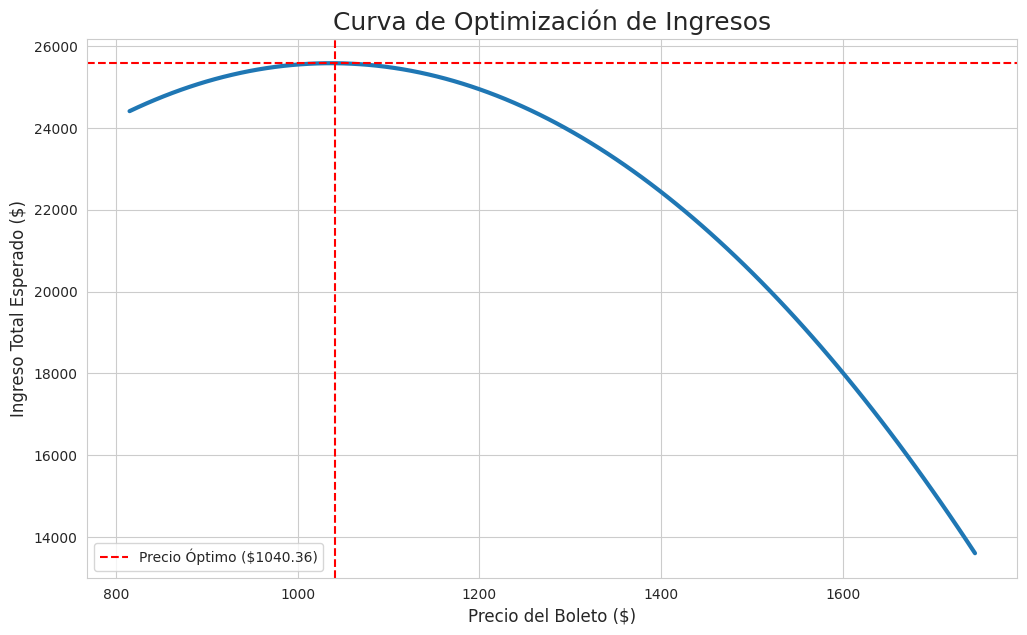

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("--- Ejecutando la simulaci√≥n final ---")

# --- PASO A: SELECCIONAR UN VIAJE DE EJEMPLO CRUDO ---
# Tomamos una muestra aleatoria directamente de df_viajes
viaje_crudo = df_viajes.sample(1, random_state=42)
tarifa_base_ejemplo = viaje_crudo['tarifa_promedio'].iloc[0]


# --- PASO B: APLICAR LA MISMA PREPARACI√ìN QUE AL MODELO ORIGINAL ---
# 1. Seleccionar solo las columnas predictoras que usamos para entrenar
X_ejemplo = viaje_crudo[columnas_predictoras]

# 2. Aplicar One-Hot Encoding
X_ejemplo_codificado = pd.get_dummies(X_ejemplo, columns=columnas_categoricas, drop_first=True)

# 3. **LA CLAVE**: Alinear las columnas del ejemplo con las del modelo final
# Esto a√±ade las columnas que faltan (con valor 0) y asegura el orden correcto.
X_ejemplo_alineado = X_ejemplo_codificado.reindex(columns=X_final.columns, fill_value=0)

# 4. Escalar los datos con el MISMO escalador que usamos antes
X_ejemplo_final = scaler.transform(X_ejemplo_alineado)


# --- PASO C: PREDECIR LA DEMANDA BASE (FASE 1) ---
# Ahora la predicci√≥n funcionar√° porque las columnas coinciden
demanda_predicha_base = best_model.predict(X_ejemplo_final)[0]


# --- PASO D: EJECUTAR EL OPTIMIZADOR (FASE 3) ---
resultado_optimizacion = encontrar_precio_optimo(
    demanda_base=demanda_predicha_base,
    tarifa_base=tarifa_base_ejemplo,
    elasticidad=-1.28 # El valor que obtuvimos en la Fase 2
)

precio_final = resultado_optimizacion['precio_optimo']
ingreso_final = resultado_optimizacion['ingreso_maximo']


# --- PASO E: MOSTRAR RESULTADOS Y GR√ÅFICO ---
print(f"\nPara un viaje con una demanda base predicha de {demanda_predicha_base:.0f} boletos (a ${tarifa_base_ejemplo:.2f}):")
print("\n--------------------------------------------------")
print(f"  El precio √≥ptimo recomendado es: ${precio_final:.2f}")
print(f"  Con este precio, el ingreso esperado se maximiza a: ${ingreso_final:,.2f}")
print("--------------------------------------------------")

# Graficar
df_simulacion = resultado_optimizacion['datos_simulacion']
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")
sns.lineplot(data=df_simulacion, x='precio_probado', y='ingreso_esperado', linewidth=3)
plt.axvline(x=precio_final, color='red', linestyle='--', label=f'Precio √ìptimo (${precio_final:.2f})')
plt.axhline(y=ingreso_final, color='red', linestyle='--')
plt.title('Curva de Optimizaci√≥n de Ingresos', fontsize=18)
plt.xlabel('Precio del Boleto ($)', fontsize=12)
plt.ylabel('Ingreso Total Esperado ($)', fontsize=12)
plt.legend()
plt.show()

### **5.3.1 Analisis de Resultado**

El resultado es muy interesante y demuestra el poder de este an√°lisis. Para este viaje en particular, aunque la tarifa base era de ~  $1164 , el motor de optimizaci√≥n recomienda bajar el precio a  1040.36 pesos.

Esto es una consecuencia directa de la demanda el√°stica que se descubrio en la Fase 2. El modelo calcul√≥ que la ganancia de pasajeros que obtendr√≠as al bajar el precio es tan significativa que compensa la reducci√≥n de la tarifa, generando un ingreso total mayor ($25,581.89). El gr√°fico muestra esto claramente: el punto m√°s alto de la curva de ingresos  se encuentra en ese precio recomendado.

**Observaci√≥n:**

* **El Escenario de Alta Demanda: Cuando la Capacidad es el L√≠mite**
Ahora, imaginemos el caso contrario, como un viaje en un puente festivo:

* **Predicci√≥n Alta:** El modelo de Fase 1 (XGBoost) predice una demanda base muy alta, digamos 35 pasajeros para un autob√∫s con capacidad de 36.

* **La L√≥gica del Optimizador:** La funci√≥n encontrar_precio_optimo se ejecuta. Ahora su objetivo no es "llenar asientos" (porque ya se espera que se llenen), sino maximizar el valor de cada uno de esos asientos.

* **El C√°lculo Clave:** La funci√≥n, usando la elasticidad de -1.28, simula qu√© pasar√≠a si sube el precio.

  Sabe que si sube el precio un 10%, la demanda bajar√° un 12.8% (de 35 a ~30 pasajeros).

  Entonces compara los ingresos potenciales:

  * Ingreso Base: (35 pasajeros)($1,150(_tarifa base_))  = 40,250 pesos.

  * Ingreso Nuevo: (30 pasajeros)($1,265(tarifa +10%)) = 37,950 pesos

En este caso, subir un 10% fue demasiado. Pero la funci√≥n prueba cientos de puntos intermedios y encontrar√° el "punto maximo". Descubrir√° que puede subir el precio, por ejemplo, a 1,220 pesos. A ese precio, la demanda quiz√°s baje a solo 34 pasajeros, pero el ingreso total ser√° de $41,480, que es mayor que el ingreso original.

En resumen: Cuando la demanda esperada es alta, el sistema entiende que puede permitirse perder a los pasajeros m√°s sensibles al precio, porque los pasajeros que est√°n dispuestos a pagar m√°s generar√°n un ingreso total superior.

Por lo tanto, en un escenario de alta demanda, tu sistema correctamente recomendar√≠a un aumento de tarifa.

## **6. Conclusiones y cierre de Fase Din√°mica**

El trabajo realizado en este notebook ha completado con √©xito las fases fundamentales para la creaci√≥n de una estrategia de precios din√°micos. Los entregables principales de este an√°lisis son:

* **Un Modelo Predictivo de Demanda:** Un modelo de XGBoost optimizado (best_model) capaz de pronosticar la cantidad de pasajeros para un viaje con un R¬≤ de 62.03% y un MAE de 4.83 boletos.

* **Un C√°lculo de la Elasticidad del Precio:** Se ha estimado una elasticidad precio de la demanda promedio de -1.28, lo que confirma que el mercado es sensible a los cambios de precio.

* **Un Motor de Optimizaci√≥n de Ingresos:** La funci√≥n encontrar_precio_optimo sirve como el cerebro de la estrategia, capaz de recomendar el precio √∫nico que maximiza el ingreso para un viaje determinado, bas√°ndose en la demanda y la elasticidad.

Este sistema de **precio din√°mico** es la base indispensable sobre la cual se construir√° la siguiente capa de inteligencia: el precio personalizado.


## **7. Proximos pasos**


* **Hacia la Tarifa Personalizada:**
El trabajo realizado hasta este punto sienta las bases para el siguiente nivel de sofisticaci√≥n: la tarifa personalizada. El objetivo ahora es dejar de ofrecer un √∫nico precio √≥ptimo por viaje y empezar a ofrecer un precio √≥ptimo para cada tipo de cliente.

A continuaci√≥n, se detalla el plan de acci√≥n sugerido para que el equipo pueda tomar este trabajo como punto de partida.

* **Paso 1: Segmentaci√≥n de Clientes (Clustering)**
El primer paso es agrupar a los clientes en segmentos con comportamientos de compra similares.

  * **Objetivo:** Crear cl√∫steres de clientes.

  * **Datos a Utilizar:** Se debe volver al DataFrame original (antes de la agregaci√≥n, df_filtrado_kms) y utilizar caracter√≠sticas a nivel de transacci√≥n para el clustering. Algunas variables sugeridas son:

     * TIPO_PASAJERO (Adulto, Menor, INAPAM, etc.)

     * AREA_VENTA (Venta Web, Taquilla, etc.)

     * dias_anticipacion (La que creamos en el √∫ltimo paso)

     * dia_semana

    * clase_servicio

  * **Algoritmo Sugerido:** K-Means es un excelente punto de partida para este tipo de segmentaci√≥n.

* **Paso 2:** Caracterizaci√≥n de Segmentos (Creaci√≥n de "Personas")
Una vez creados los cl√∫steres, es fundamental analizarlos para entender qu√© representa cada uno y darles un nombre de "persona". Por ejemplo, se podr√≠an encontrar segmentos como:

  * **"Los Planificadores":** Compran con mucha anticipaci√≥n.

   * **"Viajeros de Negocios":*** Compran entre semana, con poca anticipaci√≥n y prefieren servicios de mayor categor√≠a.

   * **"Cazadores de Ofertas":** Compran principalmente en l√≠nea (VENTA WEB SERVICES) y son sensibles a las promociones.

Paso 3: C√°lculo de Elasticidad por Segmento
Este es el paso m√°s importante para la personalizaci√≥n. En lugar de tener una √∫nica elasticidad de -1.28 para todos, se debe recalcular la elasticidad del precio para cada segmento.

Resultado Esperado: Se esperar√≠a que los "Viajeros de Negocios" sean inel√°sticos (ej. -0.5), mientras que los "Cazadores de Ofertas" sean muy el√°sticos (ej. -2.5).

Paso 4: Implementaci√≥n del Motor de Precios Personalizados
Finalmente, se modifica el motor de optimizaci√≥n de la Fase 3. En lugar de realizar un √∫nico c√°lculo por viaje, el motor ahora deber√°:

Usar el modelo de demanda de la Fase 1 para predecir la demanda total del viaje.

Estimar cu√°ntos pasajeros de cada segmento se esperan en ese viaje.

Para cada segmento, ejecutar la funci√≥n encontrar_precio_optimo utilizando la elasticidad espec√≠fica de ese segmento.

El resultado final ya no ser√° un √∫nico precio recomendado, sino m√∫ltiples precios personalizados para un mismo viaje, optimizados para maximizar el ingreso total considerando el comportamiento de cada tipo de cliente.